# Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
direct_load_link = "https://gist.github.com/singhsidhukuldeep/065a77ae307134cb48b3ad9b664c636e/raw/ee3a84e683a60b305b2da28355e71faa44aaaf51/cars24-car-price-clean.csv"

In [3]:
df = pd.read_csv(direct_load_link)
print(df.shape)
df.head()

(19820, 18)


,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [4]:
X = df["max_power"].values
Y = df["selling_price"].values

In [5]:
def hypothesis(x, weights):
    y_hat = weights[0]+weights[1]*x
    return y_hat

In [6]:
def error(X, Y, weights):
    n = len(X)
    err = 0
    
    for i in range(n):
        x_i = X[i]
        y_i = Y[i]
        y_hat_i = hypothesis(x_i, weights)
        error_i = (y_i - y_hat_i)**2
        err = err+error_i
    return err/n

In [7]:
def gradient(X, Y, weights):
    n = len(X)
    grad = np.zeros((2,))
    
    for i in range(n):
        x_i = X[i]
        y_i = Y[i]
        y_hat_i = hypothesis(x_i, weights)
        grad[0] += -2*(y_i -y_hat_i)
        grad[1] += -2*(y_i -y_hat_i)*x_i
        
    return grad/n

In [8]:
def gradient_descent(X, Y, max_iter = 100, learning_rate=0.1):
    weights = np.random.rand(2)
    error_list = []
    for i in range(max_iter):
        error_list.append( error (X, Y, weights))
        
        gradient_val = gradient(X, Y, weights)
        weights[0] = weights[0]-learning_rate*gradient_val[0] ## w0
        weights[1] = weights[1]-learning_rate*gradient_val[1] ## w1
    return weights, error_list     

In [9]:
opt_weights, error_list = gradient_descent(X, Y)

In [10]:
opt_weights

array([1.86901752e-10, 7.70389854e-01])

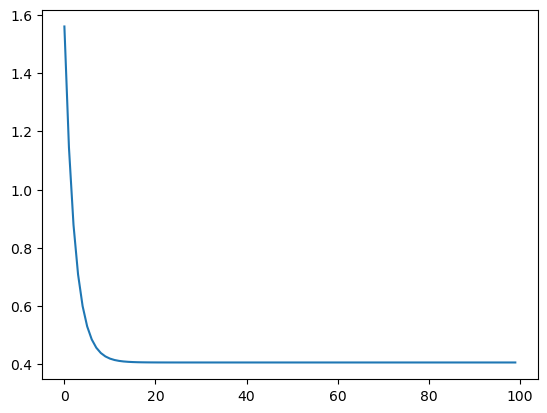

In [11]:
plt.plot(error_list)

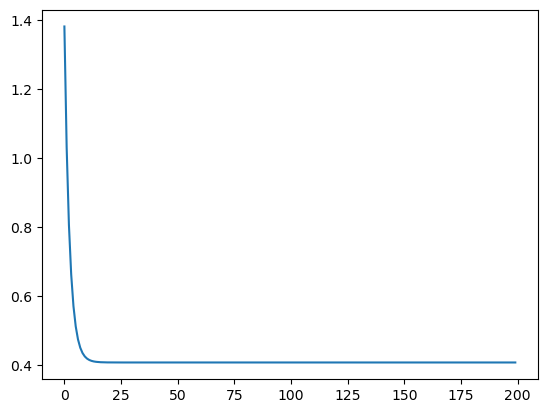

In [12]:
opt_weights, error_list = gradient_descent(X, Y, max_iter = 200)
plt.plot(error_list)

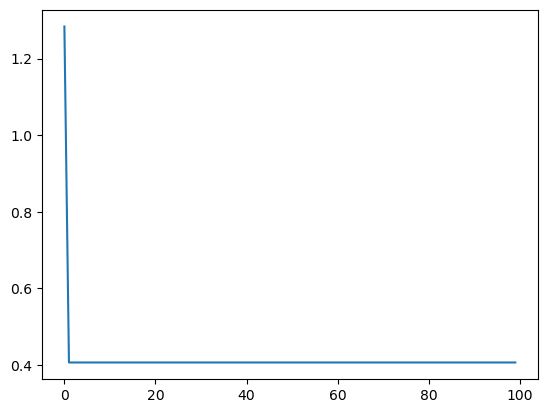

In [13]:
opt_weights, error_list = gradient_descent(X, Y, max_iter = 100, learning_rate=0.5)
plt.plot(error_list)

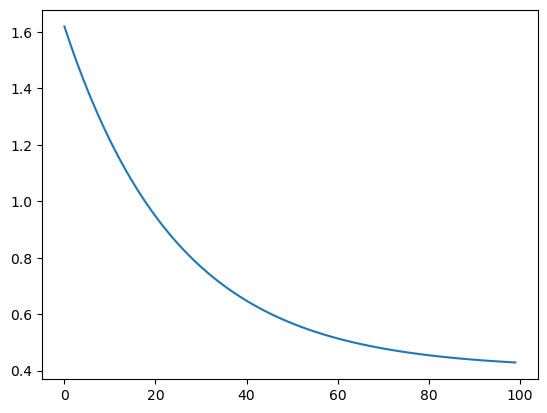

In [14]:
opt_weights, error_list = gradient_descent(X, Y, max_iter = 100, learning_rate=0.01)
plt.plot(error_list)

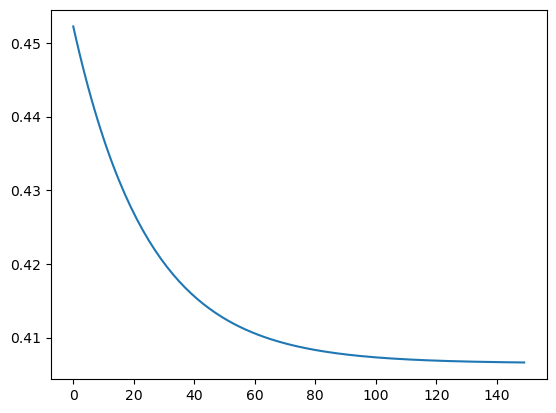

In [15]:
opt_weights, error_list = gradient_descent(X, Y, max_iter = 150, learning_rate=0.01)
plt.plot(error_list)

In [16]:
hypothesis(x=0.8, weights=opt_weights)

0.623066000255362

In [21]:
y_pred = []
for x in X:
    y_pred.append(hypothesis(x, weights=opt_weights))
y_pred = np.array(y_pred)

In [22]:
y_pred[180], Y[180]

(-0.706760925883711, -0.8428521544192256)

In [25]:
 def r2score(Y, y_pred):
        num = np.sum((Y-y_pred)**2)
        denom = np.sum((Y-Y.mean())**2)
        return 1 - (num/denom)

In [26]:
r2score(Y, y_pred)

0.593393842958889

In [27]:
df = pd.read_csv(direct_load_link)
print(df.shape)
df.head()

(19820, 18)


,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [28]:
df.columns

Index(['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5'],
      dtype='object')

In [39]:
Y = df["selling_price"].values
print("shape of Y", Y.shape)
X = df[['year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5']].values
print("shape of X", X.shape)

shape of Y (19820,)
shape of X (19820, 17)


In [40]:
ones = np.ones((len(X),1))
print(ones.shape)

(19820, 1)


In [41]:
X = np.hstack([ones, X])
print("shape of X",X.shape)

shape of X (19820, 18)


In [46]:
X[180]

array([ 1.        ,  0.13719357, -0.06107699,  1.38135096, -1.04077506,
       -0.93436884, -0.13719357, -0.93556599, -0.98083648, -0.80070971,
       -0.09838223,  1.01494517, -0.02009467, -0.0569168 , -0.97596977,
        0.4958182 ,  0.44450319, -0.42472845])

In [47]:
def hypothesis(X, W):
    return np.dot(X, W)

In [48]:
def error(X, Y, W):
    Y_hat = hypothesis(X, W)
    return np.mean((Y-Y_hat)**2)

In [49]:
def gradient(X, Y, W):
    Y_hat = hypothesis(X, W)
    return np.dot(X.T, Y_hat-Y)*(2/len(X))   

In [50]:
def gradient_descent(X, Y, max_iter = 100, learning_rate=0.1):
    num_features = X.shape[1]
    W = np.random.rand(num_features)
    error_list = []
    for i in range(max_iter):
        error_list.append(error(X, Y, W))
        GRAD = gradient(X, Y, W)
        W = W - (GRAD * learning_rate)
    return W, error_list

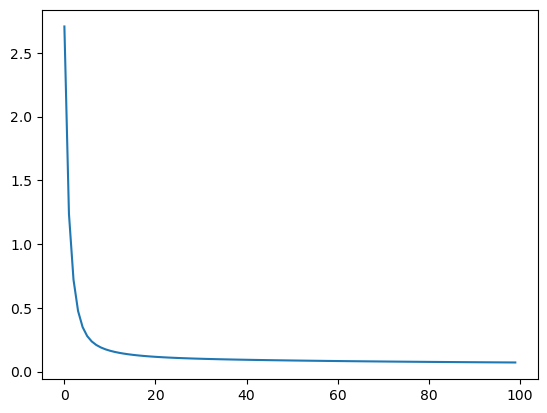

In [52]:
opt_weights, error_list = gradient_descent(X, Y, max_iter = 100, learning_rate=0.1)
plt.plot(error_list)

In [53]:
 def r2score(Y, y_pred):
        num = np.sum((Y-y_pred)**2)
        denom = np.sum((Y-Y.mean())**2)
        return 1 - (num/denom)

In [54]:
r2score(Y, hypothesis(X, W=opt_weights))

0.9284449315811678

In [55]:
(0.92-0.59)/0.59

0.5593220338983053

In [58]:
import sklearn

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [62]:
r2score(Y, y_pred=model.predict(X))

0.9421889572026914

In [63]:
model.score(X,Y)

0.9421889572026914

In [64]:
model.coef_, model.intercept_

(array([ 0.        ,  0.06495341, -0.0182326 , -0.0486858 ,  0.03138293,
         0.0273649 , -0.06495341,  0.06078463,  0.79415416, -0.01695224,
        -0.00347518,  0.01408238,  0.01275246,  0.00283068, -0.02258059,
        -0.01293416, -0.02464122, -0.03265486]),
 -6.336516858810288e-17)

In [65]:
def adjr2score(Y, y_pred, X):
    num = np.sum((Y-y_pred)**2)
    denom = np.sum((Y-Y.mean())**2)
    r2score = 1 - (num/denom)
    n,d = X.shape
    return 1 - ((1-r2score)*(n-1)/(n-d-1)) 

In [66]:
adjr2score(Y, y_pred = model.predict(X), X=X)

0.942136404363423